In [1]:
# Take some data in Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load Dataset

In [2]:
# Import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
# change the path according to your file location in your Google Drive
dataset = pd.read_excel('Data Diabetes.xlsx', engine = 'openpyxl',header=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# First 5 rows
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# general information about dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Summary of data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

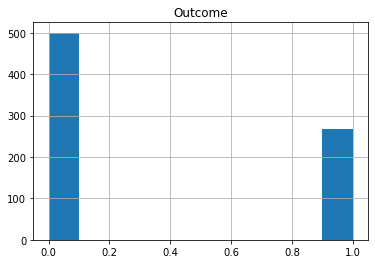

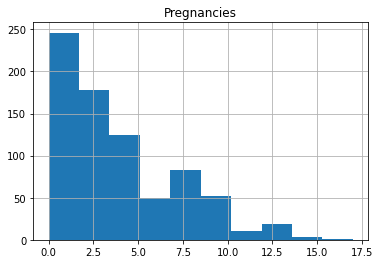

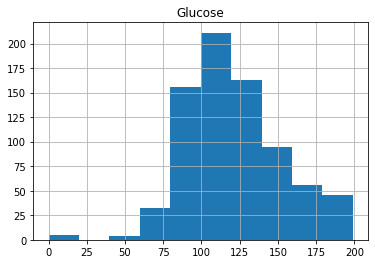

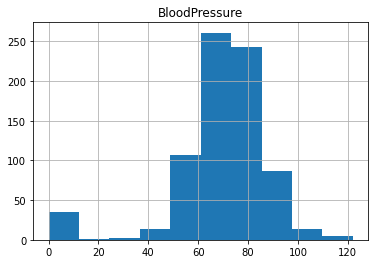

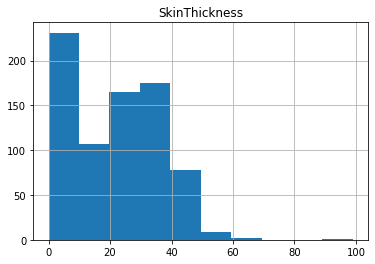

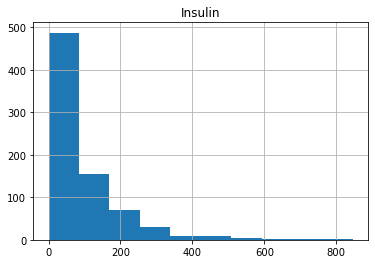

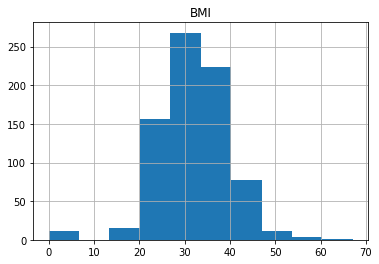

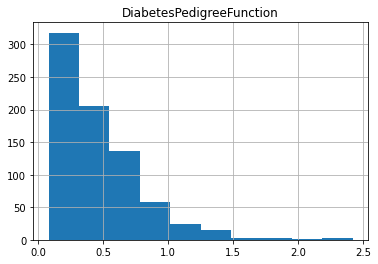

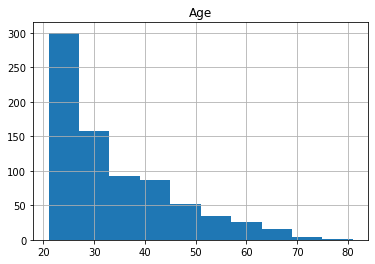

In [7]:
#Visualization Variable using Histogram
dataset.hist(column='Outcome')
dataset.hist(column='Pregnancies')
dataset.hist(column='Glucose')
dataset.hist(column='BloodPressure')
dataset.hist(column='SkinThickness')
dataset.hist(column='Insulin')
dataset.hist(column='BMI')
dataset.hist(column='DiabetesPedigreeFunction')
dataset.hist(column='Age')

In [8]:
#Filtering Outcome 0 and 1
no_diabetes = dataset[(dataset.Outcome == 0)]
no_diabetes

diabetes = dataset[(dataset.Outcome == 1)]
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


array([<AxesSubplot:title={'center':'Age'}>], dtype=object)

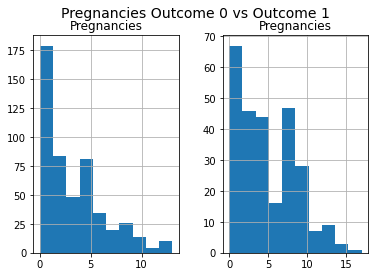

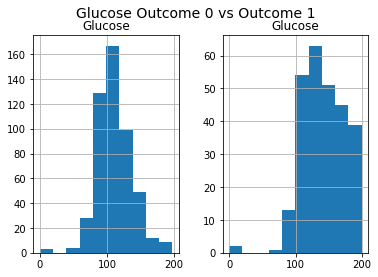

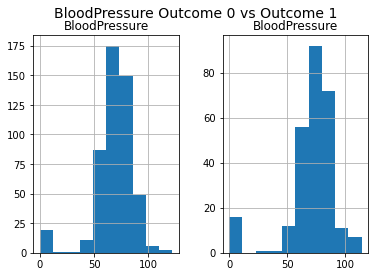

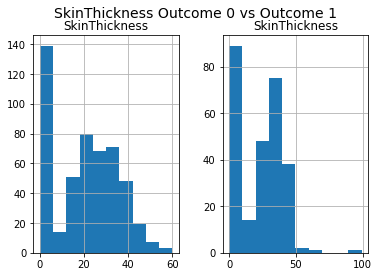

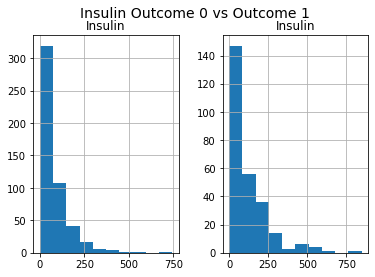

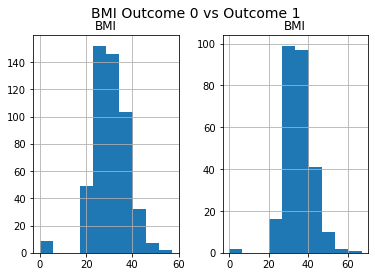

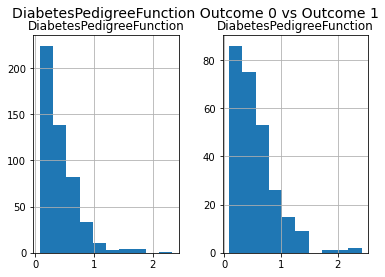

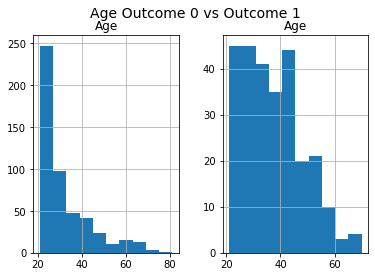

In [9]:
#Visualization Plot
fig, axes = plt.subplots(1, 2)

fig.suptitle('Pregnancies Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='Pregnancies', ax=axes[0])
diabetes.hist(column='Pregnancies', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('Glucose Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='Glucose', ax=axes[0])
diabetes.hist(column='Glucose', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('BloodPressure Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='BloodPressure', ax=axes[0])
diabetes.hist(column='BloodPressure', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('SkinThickness Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='SkinThickness', ax=axes[0])
diabetes.hist(column='SkinThickness', ax=axes[1])

fig, axes = plt.subplots(1, 2)

fig.suptitle('Insulin Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='Insulin', ax=axes[0])
diabetes.hist(column='Insulin', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('BMI Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='BMI', ax=axes[0])
diabetes.hist(column='BMI', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('DiabetesPedigreeFunction Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='DiabetesPedigreeFunction', ax=axes[0])
diabetes.hist(column='DiabetesPedigreeFunction', ax=axes[1])


fig, axes = plt.subplots(1, 2)

fig.suptitle('Age Outcome 0 vs Outcome 1', fontsize=14)
no_diabetes.hist(column='Age', ax=axes[0])
diabetes.hist(column='Age', ax=axes[1])

<AxesSubplot:>

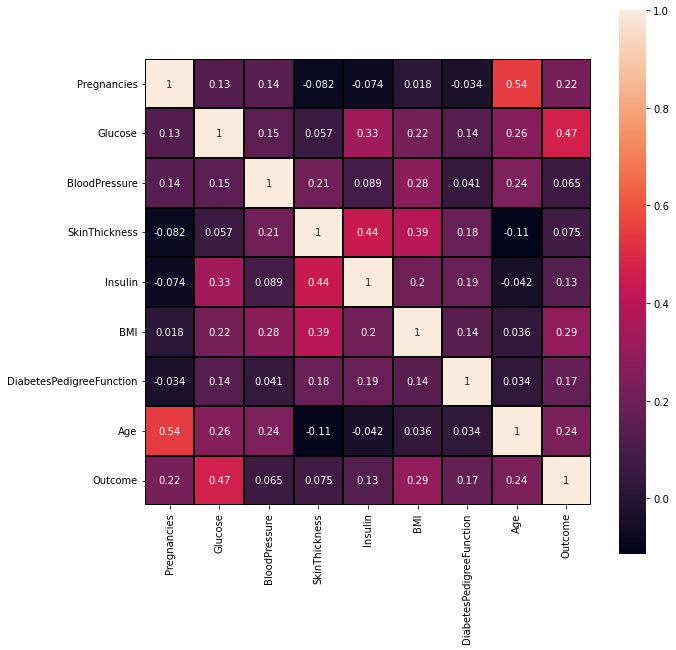

In [10]:
#Data Corelattion
f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(dataset.corr(), linewidth=0.25, vmax=1.0,square=True, linecolor='black', annot=True)

In [11]:
diabetes = dataset.copy()
Y = diabetes['Outcome']
X = diabetes.drop(columns = 'Outcome')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [12]:
print('Jumlah data training', len(X_train), 'observasi')
print('Jumlah data testing', len(X_test), 'observasi')

Jumlah data training 537 observasi
Jumlah data testing 231 observasi


In [13]:
#Naive Bayes Sebelum Cross validation

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.77
Accuracy of GNB classifier on test set: 0.76


In [14]:
scores = cross_val_score(gnb, X_train, y_train, cv=10)

In [15]:
#Naive Bayes Setelah Cross validation

print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.7037037  0.74074074 0.77777778 0.72222222 0.7962963  0.83333333
 0.68518519 0.67924528 0.79245283 0.73584906]


(0.6792452830188679, 0.746680642907058, 0.8333333333333334)

In [16]:
#Perbedaan hasil
#Akurasi training sebelum cross-validation = 0.77 = 77%
#Rata-rata akurasi training setelah cross-validation = 0.833 = 83%

Text(83.40000000000006, 0.5, 'predicted label')

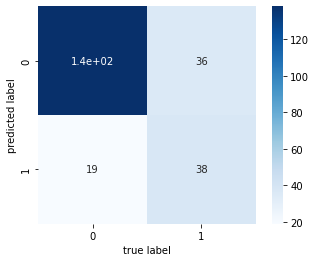

In [17]:
#confusion matrix

y_pred = gnb.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [18]:
#Decision Tree Sebelum Cross validation

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [19]:
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [20]:
#Decision Tree Setelah Cross validation

print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.57407407 0.7037037  0.74074074 0.68518519 0.68518519 0.85185185
 0.57407407 0.62264151 0.73584906 0.62264151]


(0.5740740740740741, 0.6795946890286513, 0.8518518518518519)

In [21]:
#Perbedaan hasil
#Akurasi training sebelum cross-validation = 1.00 = 100%
#Rata-rata akurasi training setelah cross-validation = 0.796 = 80% 

Text(83.40000000000006, 0.5, 'predicted label')

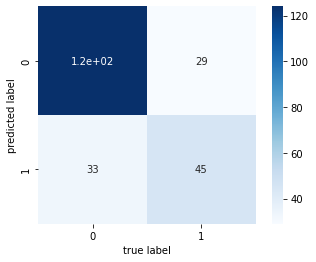

In [22]:
#confusion matrix

y_pred = clf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

[Text(0.5162377450980392, 0.96875, 'X[1] <= 144.5\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.2271533613445378, 0.90625, 'X[7] <= 28.5\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.08893557422969188, 0.84375, 'X[5] <= 30.45\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.03361344537815126, 0.78125, 'X[0] <= 7.0\ngini = 0.037\nsamples = 106\nvalue = [104, 2]'),
 Text(0.022408963585434174, 0.71875, 'X[6] <= 0.672\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.011204481792717087, 0.65625, 'gini = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.03361344537815126, 0.65625, 'X[3] <= 13.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.022408963585434174, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04481792717086835, 0.59375, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.04481792717086835, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14425770308123248, 0.78125, 'X[2] <= 53.0\ngini = 0.326\nsampl

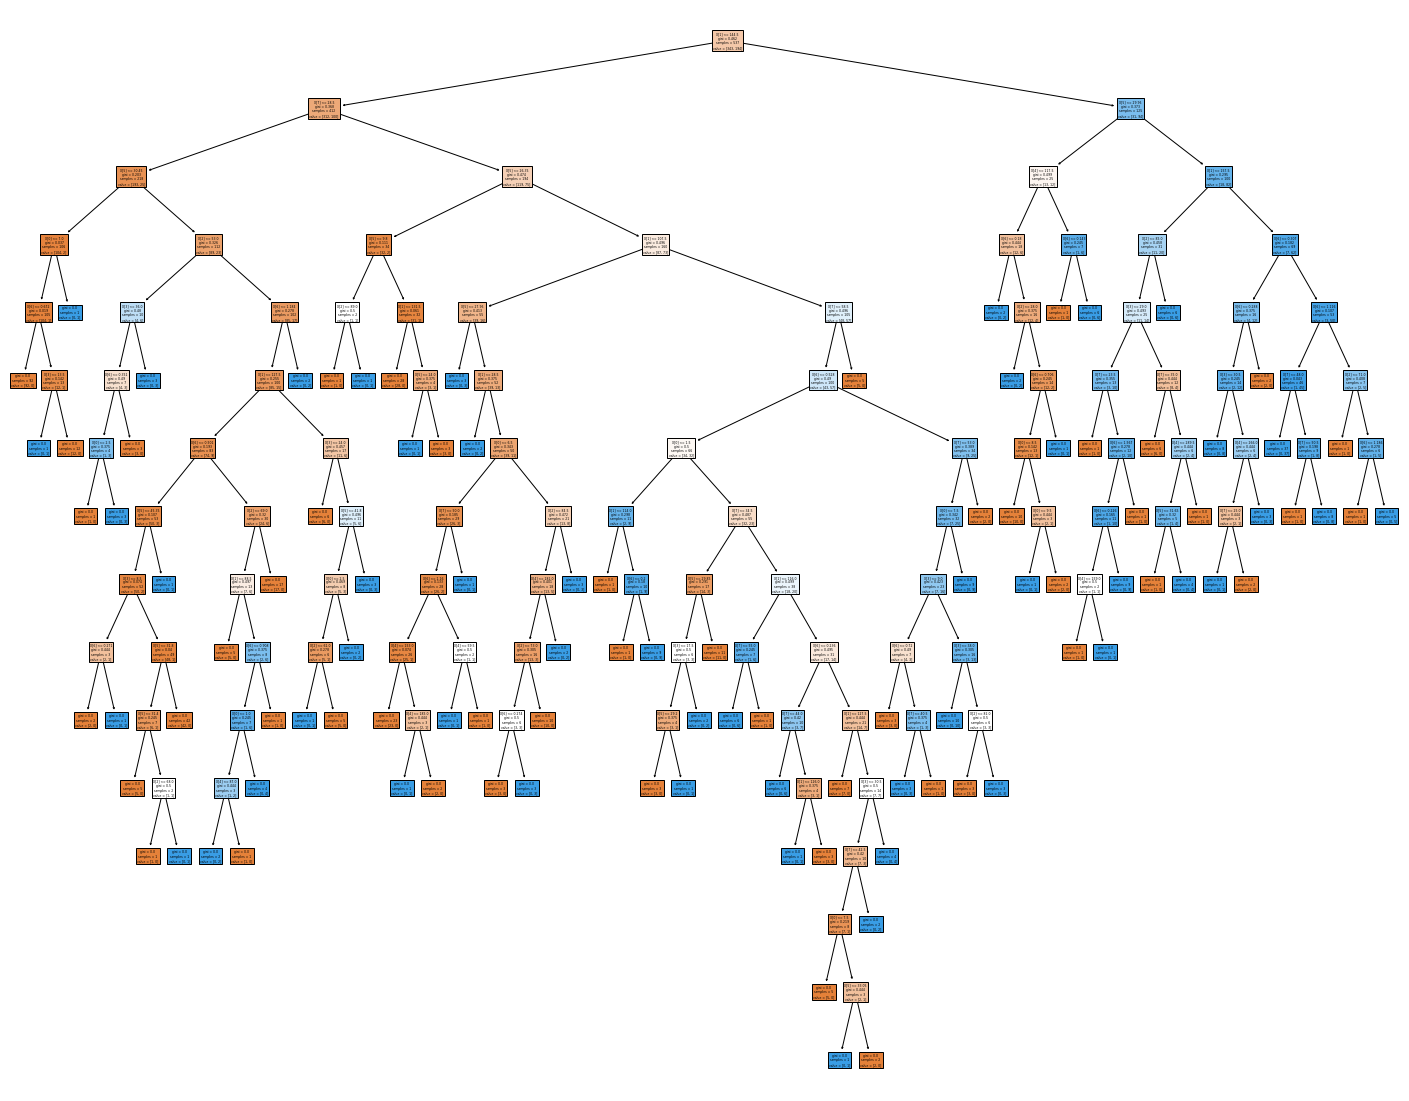

In [23]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)

In [24]:
# Pruning Decision Tree

clf_p = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_p = clf_p.fit(X_train, y_train)

y_pred_p = clf_p.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_p))

Accuracy: 0.7316017316017316


[Text(0.5, 0.875, 'X[1] <= 144.5\nentropy = 0.944\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'X[5] <= 26.45\nentropy = 0.8\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'X[7] <= 53.5\nentropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.375, 0.375, 'X[7] <= 28.5\nentropy = 0.9\nsamples = 307\nvalue = [210, 97]'),
 Text(0.3125, 0.125, 'entropy = 0.642\nsamples = 147\nvalue = [123, 24]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 160\nvalue = [87, 73]'),
 Text(0.75, 0.625, 'X[1] <= 166.5\nentropy = 0.808\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'X[6] <= 0.331\nentropy = 0.949\nsamples = 68\nvalue = [25, 43]'),
 Text(0.5625, 0.125, 'entropy = 0.985\nsamples = 28\nvalue = [16, 12]'),
 Text(0.6875, 0.125, 'entropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.875, 0.375, 'X[7] <= 57.5\nentrop

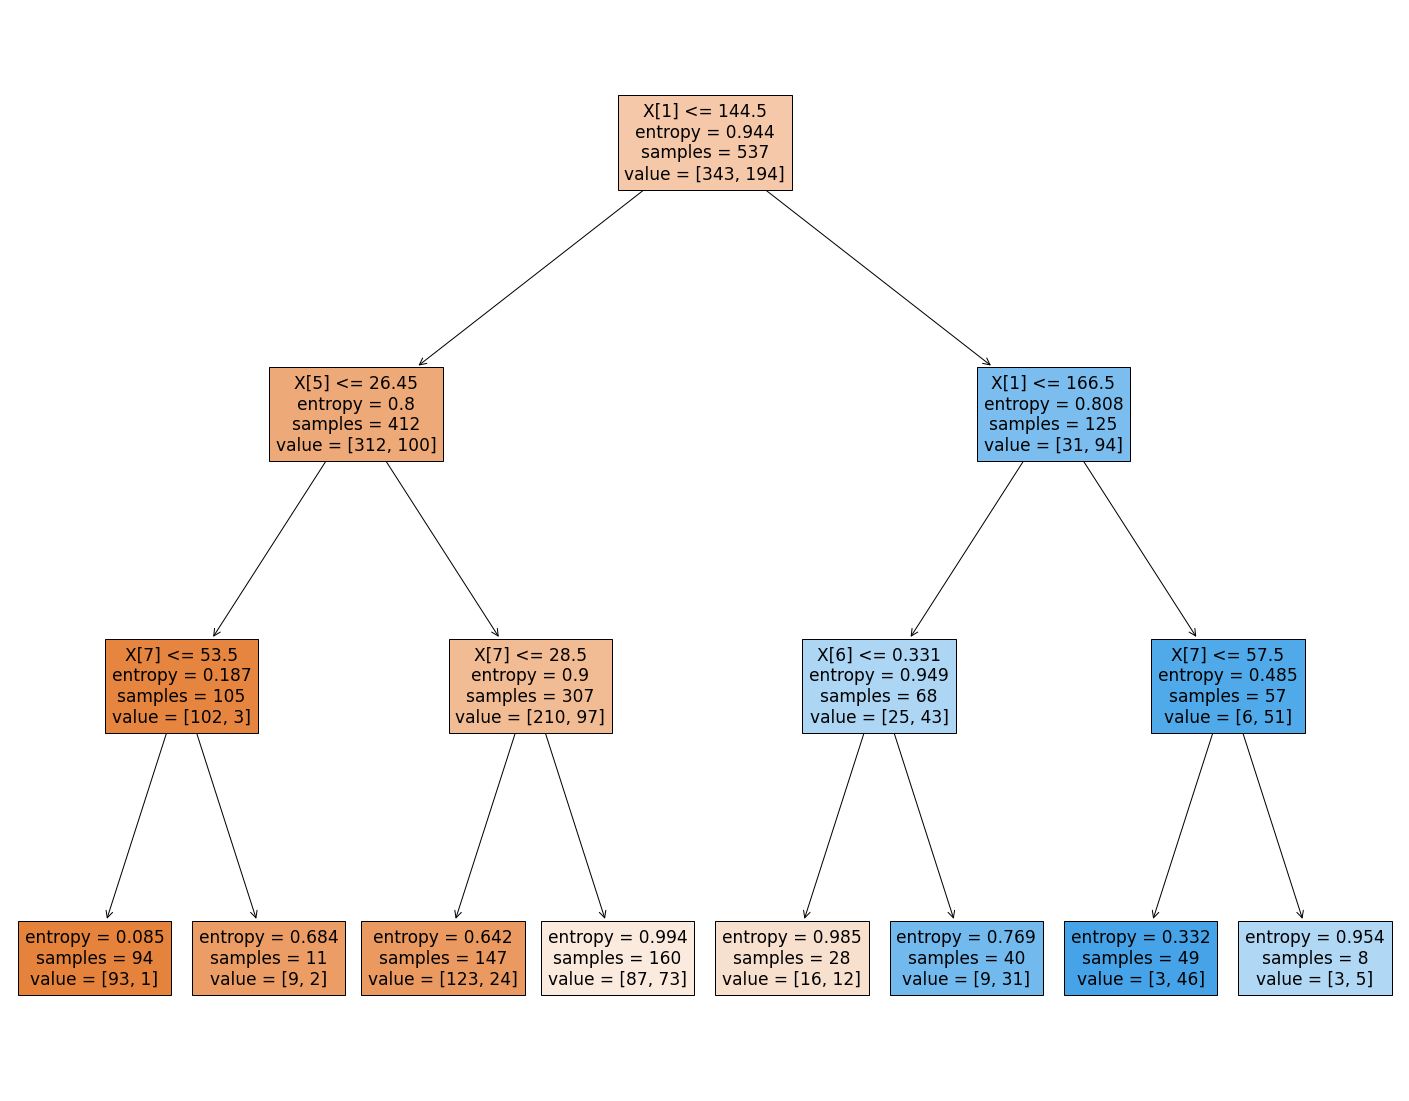

In [25]:
# Plotting Pruned Decision Tree 

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_p,filled=True)

In [26]:
#Random Forest Sebelum Cross validation

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.78


In [27]:
scores = cross_val_score(rf, X_train, y_train, cv=10)

In [28]:
#Random Forest Setelah Cross validation

print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.74074074 0.7962963  0.77777778 0.74074074 0.81481481 0.81481481
 0.59259259 0.69811321 0.77358491 0.75471698]


(0.5925925925925926, 0.75041928721174, 0.8148148148148148)

In [29]:
#Perbedaan hasil
#Akurasi training sebelum cross-validation = 1 = 100%
#Rata-rata akurasi training setelah cross-validation = 0.81 = 81% 

Text(83.40000000000006, 0.5, 'predicted label')

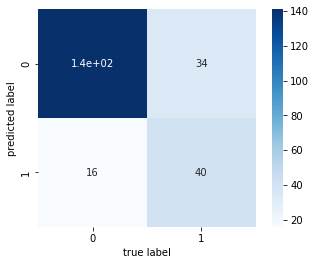

In [30]:
#confusion matrix

y_pred = rf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

[Text(0.6729266826923077, 0.9615384615384616, 'X[4] <= 179.0\ngini = 0.472\nsamples = 345\nvalue = [332, 205]'),
 Text(0.4215745192307692, 0.8846153846153846, 'X[4] <= 7.5\ngini = 0.446\nsamples = 286\nvalue = [294, 149]'),
 Text(0.19050480769230768, 0.8076923076923077, 'X[5] <= 30.85\ngini = 0.492\nsamples = 163\nvalue = [139, 108]'),
 Text(0.0625, 0.7307692307692307, 'X[1] <= 105.5\ngini = 0.337\nsamples = 74\nvalue = [84, 23]'),
 Text(0.038461538461538464, 0.6538461538461539, 'X[6] <= 1.181\ngini = 0.089\nsamples = 33\nvalue = [41, 2]'),
 Text(0.019230769230769232, 0.5769230769230769, 'X[2] <= 71.0\ngini = 0.048\nsamples = 31\nvalue = [40, 1]'),
 Text(0.009615384615384616, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [30, 0]'),
 Text(0.028846153846153848, 0.5, 'X[0] <= 11.5\ngini = 0.165\nsamples = 9\nvalue = [10, 1]'),
 Text(0.019230769230769232, 0.4230769230769231, 'gini = 0.0\nsamples = 8\nvalue = [10, 0]'),
 Text(0.038461538461538464, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nval

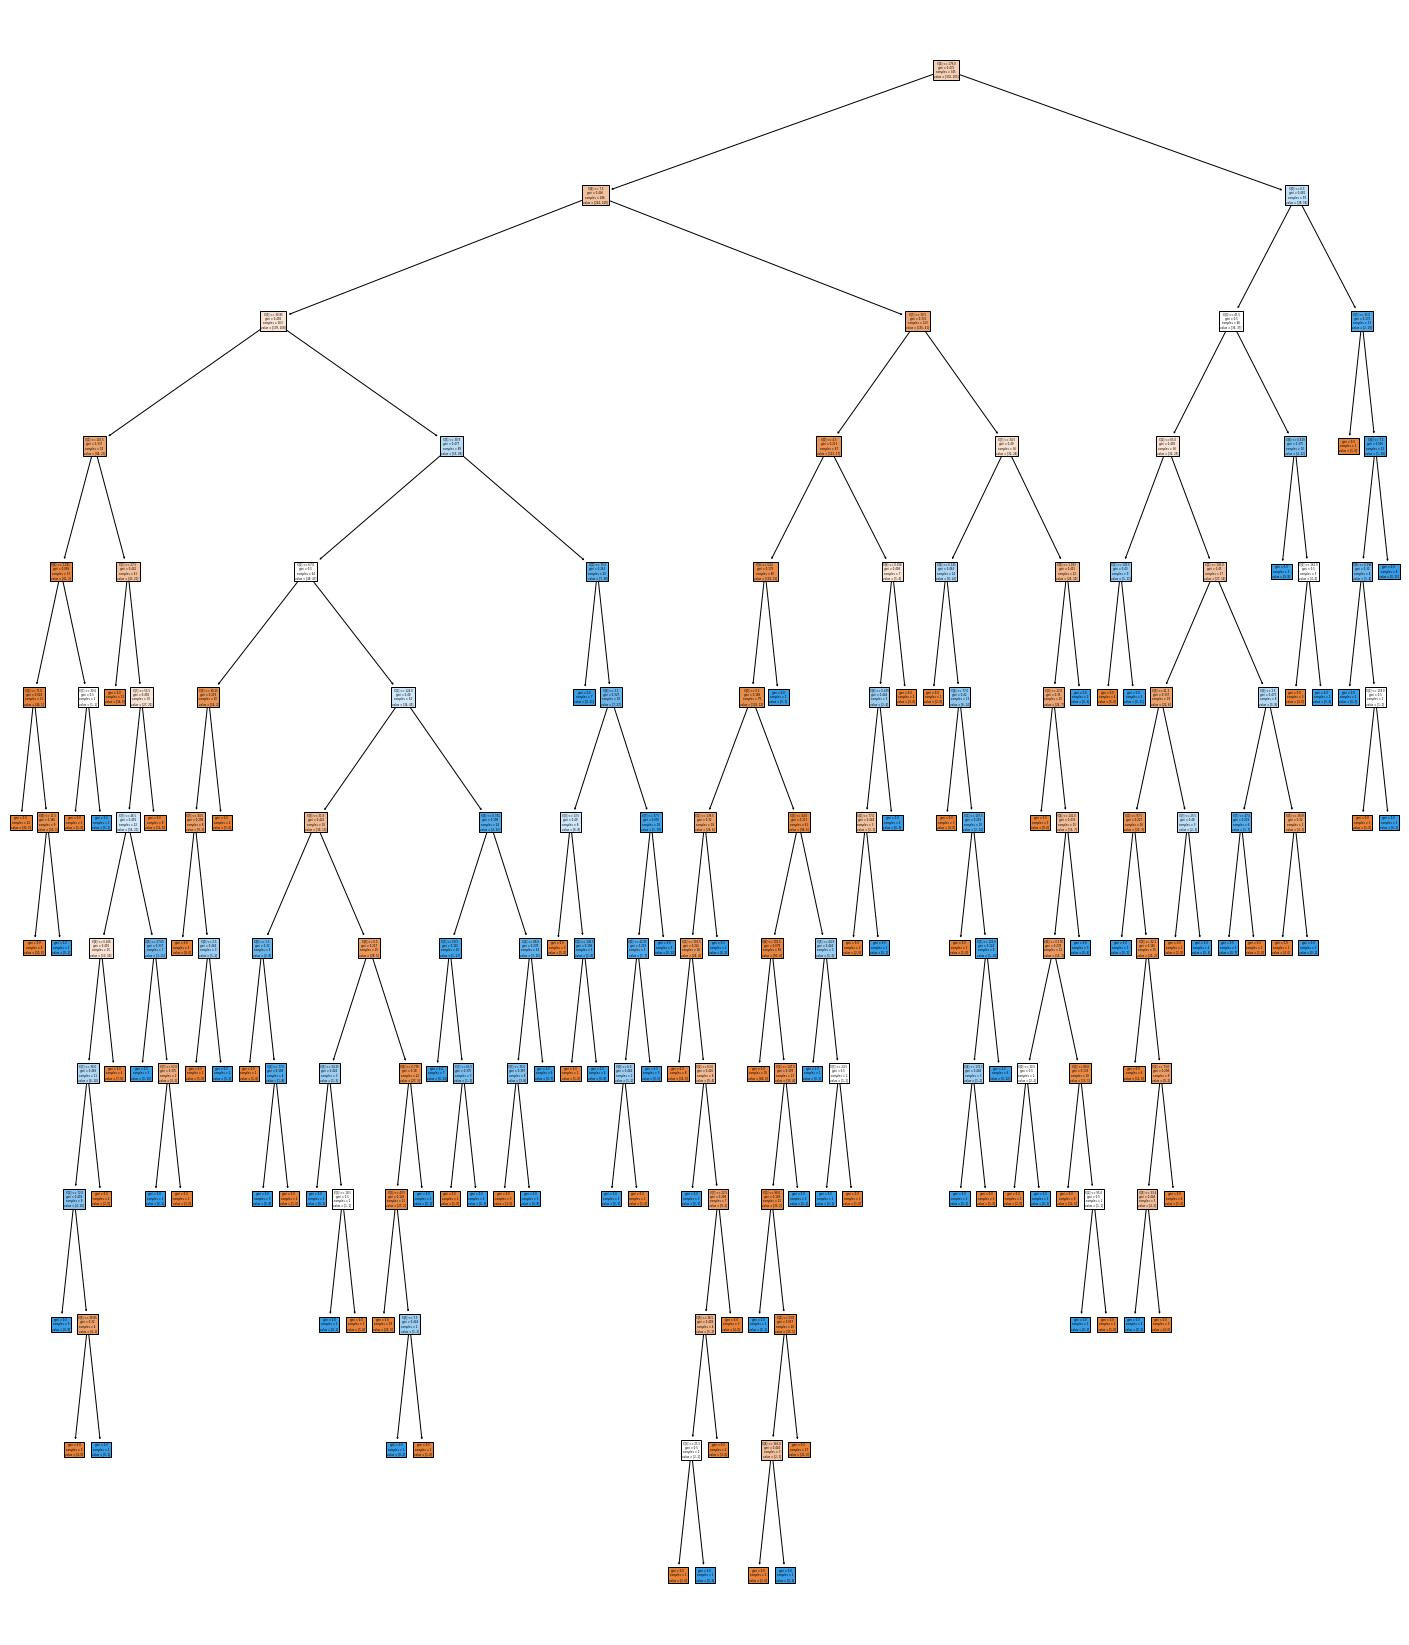

In [31]:
fig = plt.figure(figsize=(25,30))
tree.plot_tree(rf.estimators_[0],filled = True)

In [32]:
# Pruning Random Forest

rf_p = RandomForestClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5, class_weight=None)

rf_p = rf_p.fit(X_train, y_train)

y_pred_rfp = rf_p.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfp))

Accuracy: 0.7662337662337663


[Text(0.5555555555555556, 0.875, 'X[0] <= 6.5\nentropy = 0.972\nsamples = 330\nvalue = [321, 216]'),
 Text(0.3333333333333333, 0.625, 'X[7] <= 24.5\nentropy = 0.931\nsamples = 259\nvalue = [275, 146]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 31.5\nentropy = 0.52\nsamples = 79\nvalue = [106, 14]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.158\nsamples = 60\nvalue = [85, 2]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.946\nsamples = 19\nvalue = [21, 12]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.989\nsamples = 180\nvalue = [169, 132]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 128.0\nentropy = 0.969\nsamples = 71\nvalue = [46, 70]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.954\nsamples = 41\nvalue = [40, 24]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.516\nsamples = 30\nvalue = [6, 46]')]

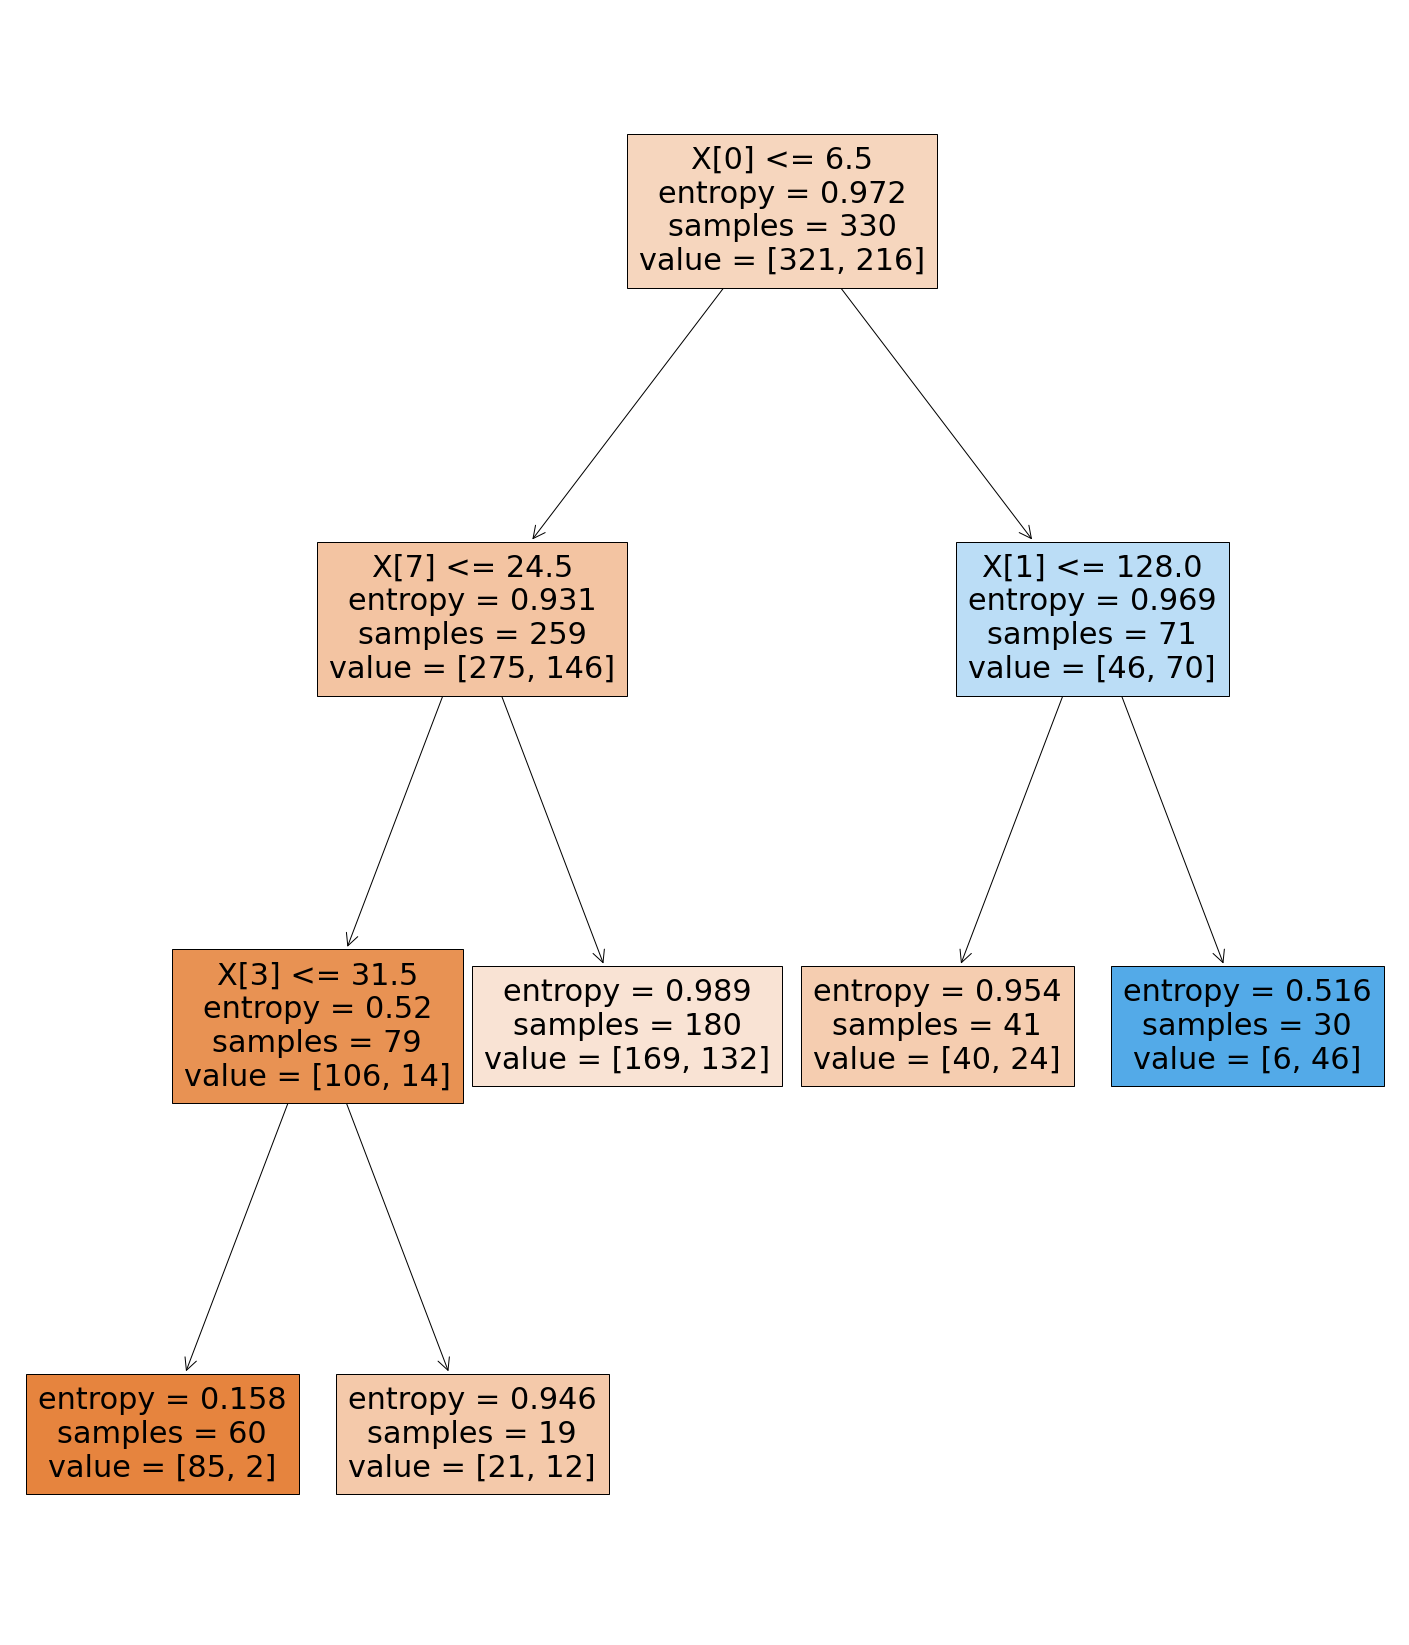

In [33]:
fig = plt.figure(figsize=(25,30))
tree.plot_tree(rf_p.estimators_[0],filled = True)